# "Gender."

### _"Classifying gender based on personal preferences" (Binary classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 5 columns and 66 entries of data about personal preferences based on gender.

Gender is a social construct. The way males and females are treated differently since birth moulds their behaviour and personal preferences into what society expects for their gender.

**Метаданные:**
    
* **Favorite Color** - Favorite color (colors reported by respondents were mapped to either warm, cool or neutral)
 
* **Favorite Music Genre** - Favorite broad music genre

* **Favorite Beverage** - Favorite alcoholic drink

* **Favorite Soft Drink** - Favorite fizzy drink

* **Gender** - Binary gender 



### Questions:
    
Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Rename Columns
* ### Columns visualisation
* ### 'gender' attribute value counts 
* ### Encode the Data

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate model 
    * #### Logistic Regression
    * #### Visualisation of predictions
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)


## Part 1: Import, Load Data.

* ### Import libraries

In [2]:
# import standard libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


* ### Read data from ‘.csv’ file

In [3]:
# read data from '.csv' file
df = pd.read_csv('gender.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [4]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


Dataset consists of 66 rows and 5 columns;

has 1 datatype: object(5);

has no missing values.

* ### Head

In [5]:
# preview of the first 5 lines of the loaded data 
df.head()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


* ### Rename Columns

In [21]:
# columns rename
df.columns = ['color', 'music', 'beverage', 'softDrink','gender']
df.columns

Index(['color', 'music', 'beverage', 'softDrink', 'gender'], dtype='object')

* ### Columns visualisation

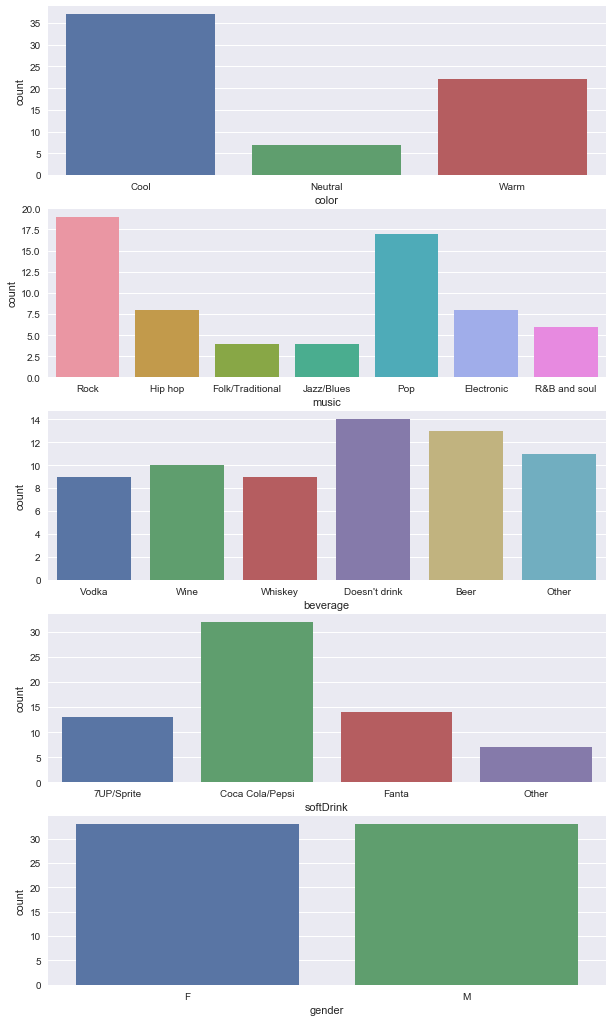

In [7]:
# columns visualisation
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10,18))
for i in range(len(df.columns)):
    sns.countplot(data=df, x=df.iloc[:,i],ax=axes[i])

* ### 'gender' attribute value counts 

In [8]:
# 'gender' value counts 
df['gender'].value_counts()

F    33
M    33
Name: gender, dtype: int64

There are 33 of 'Female' and 33 of 'Male' in our dataset. This means that our dataset is balanced.

* ### Encode the Data

In [9]:
# label encoding
le_color = LabelEncoder()
data = df
data['color'] = le_color.fit_transform(df.color.values)
le_music = LabelEncoder()
data['music'] = le_music.fit_transform(df.music.values)
le_beverage = LabelEncoder()
data['beverage'] = le_beverage.fit_transform(df.beverage.values)
le_softDrink = LabelEncoder()
data['softDrink'] = le_softDrink.fit_transform(df.softDrink.values)
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(df.gender.values)
data.head()

,color,music,beverage,softDrink,gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


## Part 3: Data Wrangling and Transformation.

* ### Creating datasets for ML part

In [10]:
# set 'X' for features' and y' for the target ('gender').
y = data['gender']
X = data.drop(['gender'],axis=1)

* ### 'Train\Test' split

In [42]:
# 'Train\Test' splitting method
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

## Part 4: Machine Learning.

* ### Build, train and evaluate model

### Logistic Regression

In [43]:
# Logistic Regression model
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [44]:
# LR predictions
LR_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

* ### Visualisation of predictions

In [45]:
# visual comparison between Actual 'Gender' and Predicted 'Gender'
actualvspredicted = pd.DataFrame({"Actual Gender":y_test,"LR Predicted Gender":LR_pred})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Gender,LR Predicted Gender
45,1,1
28,0,0
29,0,1
55,1,1
63,1,1
31,0,0
51,1,0
46,1,0
34,1,0
4,0,0


* ### Classification report

In [46]:
# classification report of LR model
print("LR Classification Report:\n", classification_report(y_test, LR_pred, digits =7)) 

LR Classification Report:
              precision    recall  f1-score   support

          0  0.4545455 0.8333333 0.5882353         6
          1  0.8333333 0.4545455 0.5882353        11

avg / total  0.6996435 0.5882353 0.5882353        17



* ### Confusion matrix

LR Confusion Matrix


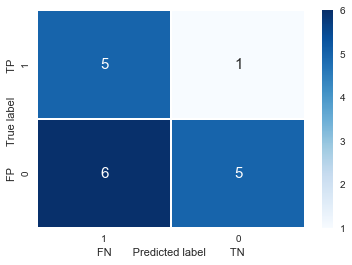

In [47]:
# confusion matrix of LR model
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print('LR Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [48]:
# ROC-AUC score of LR model
roc_auc_score(LR_pred, y_test)

0.64393939393939403

##  Conclusion.

**The main question** was: Predict a person's gender based on their personal preferences (check balance of classes; calculate perdictions).

**Answers**: 

1. The data is too small. Only 66 instances.

2. The classes are balanced.

3. Logistic Regression model was choosen. Predictions (with visual comparison) were done with an accuracy of the model equal 0.6, no hyper parameters were applied.